In [30]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
from collections import Counter
import matplotlib.pyplot as plt

In [31]:
dataset=pd.read_csv("./cardio_train.csv",delimiter=';')
dataset.shape


(70000, 13)

In [32]:
dataset.shape

(70000, 13)

In [33]:
from sklearn.model_selection import train_test_split

# Assuming X is your feature matrix and y is your target variable
X = dataset.drop(columns=['cardio'])
y = dataset['cardio']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Print the shapes of the training, validation, and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (44800, 12)
Shape of X_val: (11200, 12)
Shape of X_test: (14000, 12)
Shape of y_train: (44800,)
Shape of y_val: (11200,)
Shape of y_test: (14000,)


In [34]:

from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC



In [35]:
rf=RandomForestClassifier(criterion='entropy', max_features='sqrt')
dt= DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5, splitter='random')
gb=GradientBoostingClassifier(max_depth=4, min_samples_leaf=20)
gnb=GaussianNB(var_smoothing=0.004328761281083057)
svm=SVC(C=100, gamma='auto', probability=True)
knn=KNeighborsClassifier(metric='manhattan', n_neighbors=9, weights='distance')
lr=LogisticRegression(C=0.615848211066026, max_iter=500, penalty='l1', solver='liblinear')




<h2 style="Color:Red"> Stack 1

Define Majority voting

In [36]:


# Create a VotingClassifier with base classifiers clf1, clf2, clf3, and clf4
voting_clf1 = VotingClassifier(
    estimators=[('clf1', rf), ('clf2', dt), ('clf3', gb), ('clf4', gnb)],
    voting='hard'
)


In [37]:
# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier voting_clf
sclf1 = StackingClassifier(
    estimators=[('clf1', rf), ('clf2', dt), ('clf3', gb), ('clf4', gnb)],
    final_estimator=voting_clf1
)

In [38]:


# Fit the Stacking Classifier to the training data
sclf1.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf1, voting_clf1)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train1 = pipeline[:-1].transform(X_train)

# Now you can inspect the transformed training data
# For example, you can print the first few rows
print(transformed_X_train1[:5])  # Print the first 5 rows

# Optionally, you can perform further analysis or visualization on this transformed data
# For example, you can plot histograms or scatter plots to explore the distribution of features


[[0.36       0.41276762 0.85141147 0.54033087]
 [0.26       0.4735376  0.45870943 0.36002671]
 [0.67       0.50975098 0.36552294 0.55420754]
 [0.84       0.41276762 0.3597024  0.54312585]
 [0.89       0.68652482 0.6344803  0.59466981]]


In [39]:
transformed_X_train1.shape

(44800, 4)

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [41]:
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

Validation Accuracy

Accuracy for stack 1(Validation): 
Validation Accuracy: 0.7362
Validation Precision: 0.7397
Validation Recall: 0.7362
Validation F1 Score: 0.7354


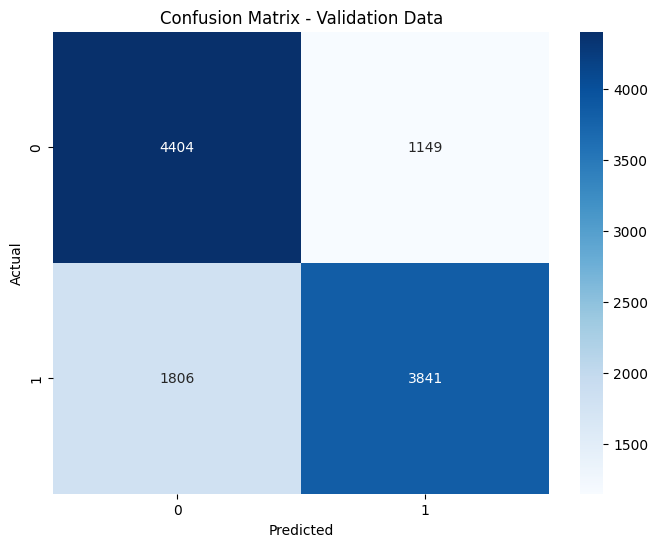

False Negative Percentage for Validation Data: 31.98%


In [42]:


# Define the function to calculate false negative percentage


# Assuming you have defined the necessary variables and models

print("Accuracy for stack 1(Validation): ")

# Make predictions on the validation set
val_predictions1 = sclf1.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions1)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions1, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions1, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions1, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions1)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Test Accuracy

Accuracy for stack 1(Test): 
Test Accuracy: 0.7366
Test Precision: 0.7389
Test Recall: 0.7366
Test F1 Score: 0.7359


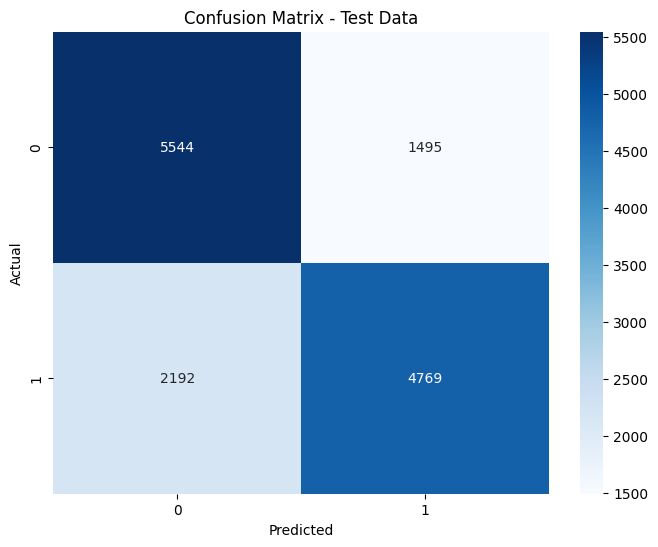

False Negative Percentage for Test Data: 31.49%


In [43]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("Accuracy for stack 1(Test): ")

# Make predictions on the test set
test_predictions1 = sclf1.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions1)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions1, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions1, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions1, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions1)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h2 style="Color:Red"> Stack 2

In [44]:


# Create a VotingClassifier with base classifiers clf1, clf2, clf3, and clf4
voting_clf2 = VotingClassifier(
    estimators=[('clf1', dt), ('clf2', gb), ('clf3', svm), ('clf4', knn)],
    voting='hard'
)


In [45]:
# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier voting_clf
sclf2 = StackingClassifier(
    estimators=[('clf1', rf), ('clf2', dt), ('clf3', gb), ('clf4', gnb)],
    final_estimator=voting_clf2
)

In [46]:


# Fit the Stacking Classifier to the training data
sclf2.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf2, voting_clf2)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train2 = pipeline[:-1].transform(X_train)


print(transformed_X_train2[:5])  # Print the first 5 rows




[[0.27       0.47309845 0.85141147 0.54033087]
 [0.21       0.47098516 0.45870943 0.36002671]
 [0.71       0.47309845 0.36552294 0.55420754]
 [0.74       0.47309845 0.3597024  0.54312585]
 [0.89       0.57429719 0.6344803  0.59466981]]


Validation


Accuracy for stack 2(Validation): 
Validation Accuracy: 0.7340
Validation Precision: 0.7385
Validation Recall: 0.7340
Validation F1 Score: 0.7330


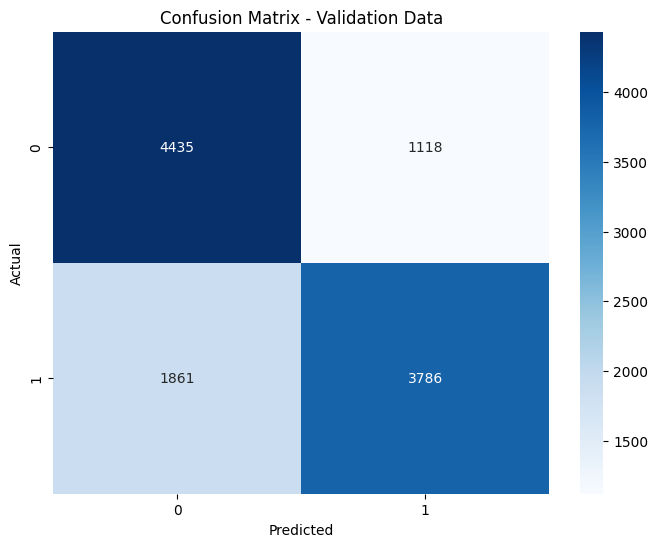

False Negative Percentage for Validation Data: 32.96%


In [47]:
print("Accuracy for stack 2(Validation): ")

# Make predictions on the validation set
val_predictions2 = sclf2.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions2)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions2, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions2, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions2, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions2)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Test

Accuracy for stack 2(Test): 
Test Accuracy: 0.7368
Test Precision: 0.7398
Test Recall: 0.7368
Test F1 Score: 0.7358


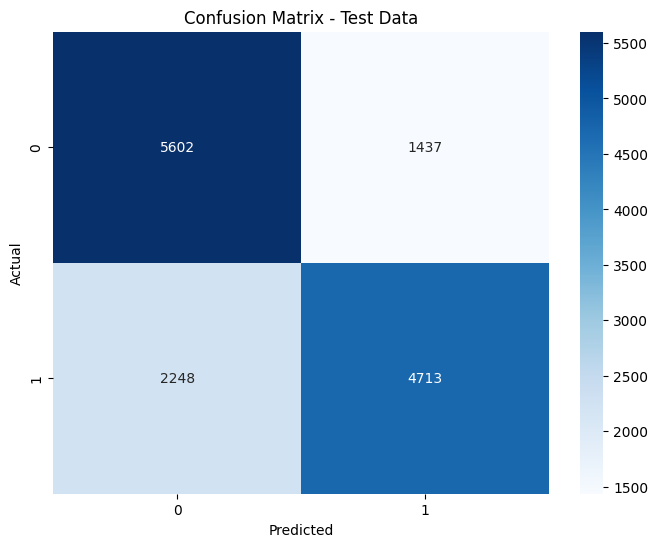

False Negative Percentage for Test Data: 32.29%


In [48]:
print("Accuracy for stack 2(Test): ")

# Make predictions on the test set
test_predictions2 = sclf2.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions2)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions2, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions2, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions2, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions2)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions2)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h2 style="Color:Red"> Stack 3

In [49]:
voting_clf3 = VotingClassifier(
    estimators=[('clf1', rf), ('clf2', knn), ('clf3', dt), ('clf4', gb)],
    voting='hard'
)

# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier voting_clf
sclf3 = StackingClassifier(
    estimators=[('clf1', rf), ('clf2', dt), ('clf3', gb), ('clf4', gnb)],
    final_estimator=voting_clf3
)



In [50]:


# Fit the Stacking Classifier to the training data
sclf3.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf3, voting_clf3)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train3 = pipeline[:-1].transform(X_train)


print(transformed_X_train3[:5])  # Print the first 5 rows




[[0.3        0.38875509 0.85141147 0.54033087]
 [0.19       0.61333333 0.45870943 0.36002671]
 [0.62       0.55630841 0.36552294 0.55420754]
 [0.72       0.38875509 0.3597024  0.54312585]
 [0.92       0.67369186 0.6344803  0.59466981]]


Validation

Accuracy for stack 3(Validation): 
Validation Accuracy: 0.7313
Validation Precision: 0.7384
Validation Recall: 0.7313
Validation F1 Score: 0.7296


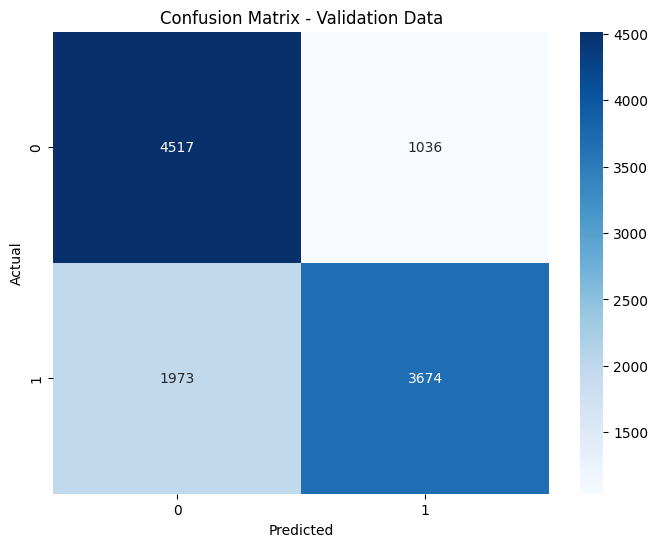

False Negative Percentage for Validation Data: 34.94%


In [51]:
print("Accuracy for stack 3(Validation): ")

# Make predictions on the validation set
val_predictions3 = sclf3.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions3)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions3, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions3, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions3, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions3)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Test

Accuracy for stack 3(Test): 


Test Accuracy: 0.7329
Test Precision: 0.7377
Test Recall: 0.7329
Test F1 Score: 0.7313


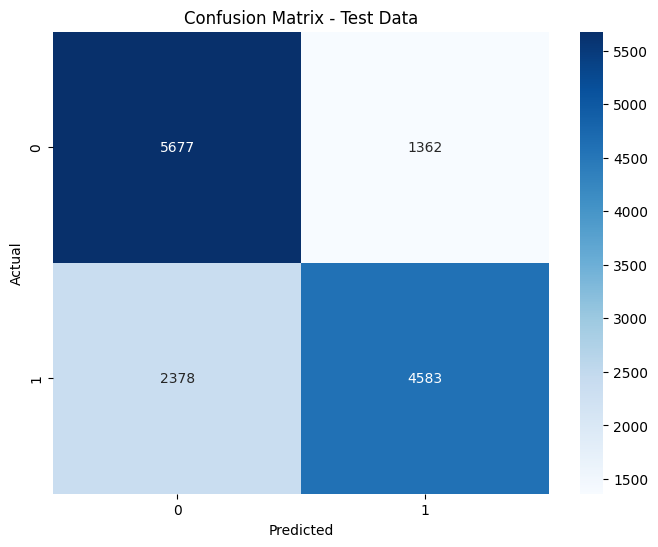

False Negative Percentage for Test Data: 34.16%


In [52]:
print("Accuracy for stack 3(Test): ")

# Make predictions on the test set
test_predictions3 = sclf3.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions3)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions3, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions3, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions3, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions3)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions3)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h2 style="Color:Red"> Stack 4

In [53]:
voting_clf4 = VotingClassifier(
    estimators=[('clf1', dt), ('clf2', gb), ('clf3', lr), ('clf4', svm)],
    voting='hard'
)


# Create a StackingClassifier with base classifiers clf1, clf2, clf3, and clf4, and meta-classifier voting_clf
sclf4 = StackingClassifier(
    estimators=[('clf1', rf), ('clf2', dt), ('clf3', gb), ('clf4', gnb)],
    final_estimator=voting_clf4
)


In [54]:


# Fit the Stacking Classifier to the training data
sclf4.fit(X_train, y_train)

# Create a pipeline with the Stacking Classifier and the final logistic regression model
pipeline = make_pipeline(sclf4, voting_clf4)

# Use the pipeline to transform the training data into the feature space of the logistic regression model
transformed_X_train4 = pipeline[:-1].transform(X_train)


print(transformed_X_train4[:5])  # Print the first 5 rows




[[0.37       0.44393684 0.85141147 0.54033087]
 [0.22       0.57734092 0.45870943 0.36002671]
 [0.63       0.53336423 0.36552294 0.55420754]
 [0.8        0.44393684 0.3597024  0.54312585]
 [0.88       0.60734642 0.6344803  0.59466981]]


Validation

Accuracy for stack 4(Validation): 
Validation Accuracy: 0.7363
Validation Precision: 0.7419
Validation Recall: 0.7363
Validation F1 Score: 0.7351


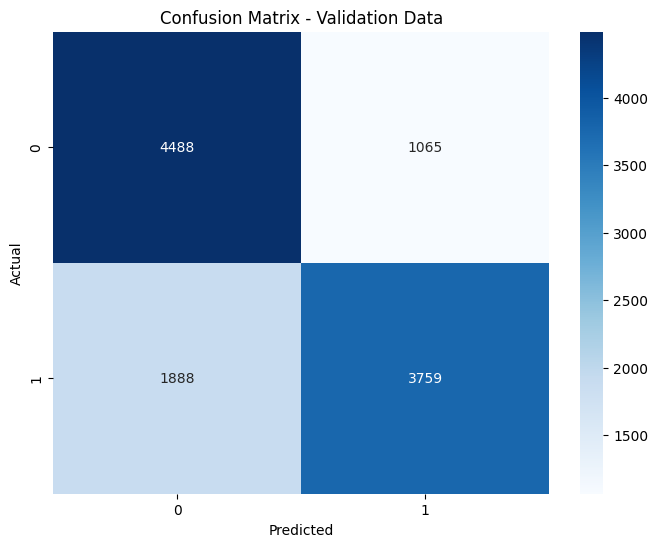

False Negative Percentage for Validation Data: 33.43%


In [55]:
print("Accuracy for stack 4(Validation): ")

# Make predictions on the validation set
val_predictions4 = sclf4.predict(X_val)

# Calculate accuracy
accuracy = accuracy_score(y_val, val_predictions4)
print("Validation Accuracy: %0.4f" % accuracy)

# Calculate precision
precision = precision_score(y_val, val_predictions4, average='weighted')
print("Validation Precision: %0.4f" % precision)

# Calculate recall
recall = recall_score(y_val, val_predictions4, average='weighted')
print("Validation Recall: %0.4f" % recall)

# Calculate F1 score
f1 = f1_score(y_val, val_predictions4, average='weighted')
print("Validation F1 Score: %0.4f" % f1)

# Plot confusion matrix for validation data
cm = confusion_matrix(y_val, val_predictions4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Validation Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for validation data
false_negative_percentage = calculate_false_negative(y_val, val_predictions4)
print(f"False Negative Percentage for Validation Data: {false_negative_percentage:.2f}%")


Test

Accuracy for stack 4(Test): 


Test Accuracy: 0.7369
Test Precision: 0.7406
Test Recall: 0.7369
Test F1 Score: 0.7358


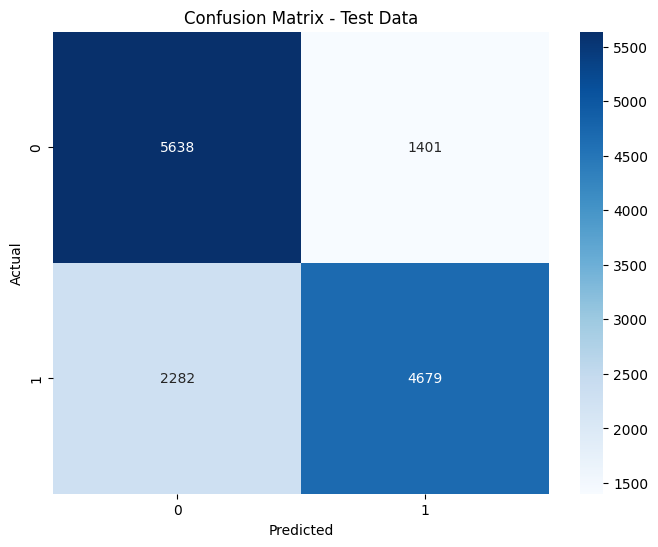

False Negative Percentage for Test Data: 32.78%


In [56]:
print("Accuracy for stack 4(Test): ")

# Make predictions on the test set
test_predictions4 = sclf4.predict(X_test)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, test_predictions4)
print("Test Accuracy: %0.4f" % test_accuracy)

# Calculate precision
test_precision = precision_score(y_test, test_predictions4, average='weighted')
print("Test Precision: %0.4f" % test_precision)

# Calculate recall
test_recall = recall_score(y_test, test_predictions4, average='weighted')
print("Test Recall: %0.4f" % test_recall)

# Calculate F1 score
test_f1 = f1_score(y_test, test_predictions4, average='weighted')
print("Test F1 Score: %0.4f" % test_f1)

# Plot confusion matrix for test data
cm = confusion_matrix(y_test, test_predictions4)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Test Data")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate false negative percentage for test data
false_negative_percentage = calculate_false_negative(y_test, test_predictions4)
print(f"False Negative Percentage for Test Data: {false_negative_percentage:.2f}%")


<h1 style="Color: Violet"> Combined Majority voting

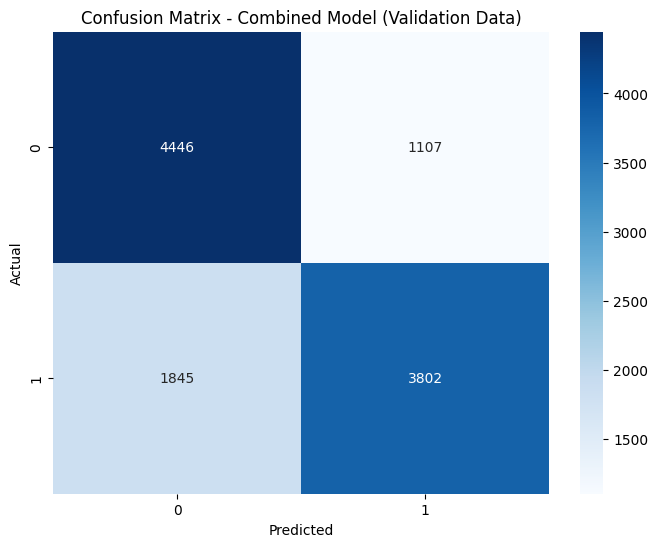

False Negative Percentage for Combined Model (Validation Data): 32.67%
Accuracy for Combined Model (Validation Data):  0.7364285714285714
Precision for Combined Model (Validation Data):  0.7408942577098159
Recall for Combined Model (Validation Data):  0.7364285714285714
F1 Score for Combined Model (Validation Data):  0.735426628973165


In [57]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the function to calculate false negative percentage
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

# Combine predictions using majority voting
combined_val_predictions = []
for p1, p2, p3, p4 in zip(val_predictions1, val_predictions2, val_predictions3, val_predictions4):
    votes = Counter([p1, p2, p3, p4])
    combined_val_predictions.append(votes.most_common(1)[0][0])

# Plot confusion matrix for the combined model
cm_combined = confusion_matrix(y_val, combined_val_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_val), yticklabels=np.unique(y_val))
plt.title("Confusion Matrix - Combined Model (Validation Data)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print the false negative percentage for the combined model
false_negative_percentage_combined = calculate_false_negative(y_val, combined_val_predictions)
print(f"False Negative Percentage for Combined Model (Validation Data): {false_negative_percentage_combined:.2f}%")

# Calculate metrics for the combined model
accuracy_combined = accuracy_score(y_val, combined_val_predictions)
precision_combined = precision_score(y_val, combined_val_predictions, average='weighted')
recall_combined = recall_score(y_val, combined_val_predictions, average='weighted')
f1_combined = f1_score(y_val, combined_val_predictions, average='weighted')

# Print metrics for the combined model
print("Accuracy for Combined Model (Validation Data): ", accuracy_combined)
print("Precision for Combined Model (Validation Data): ", precision_combined)
print("Recall for Combined Model (Validation Data): ", recall_combined)
print("F1 Score for Combined Model (Validation Data): ", f1_combined)


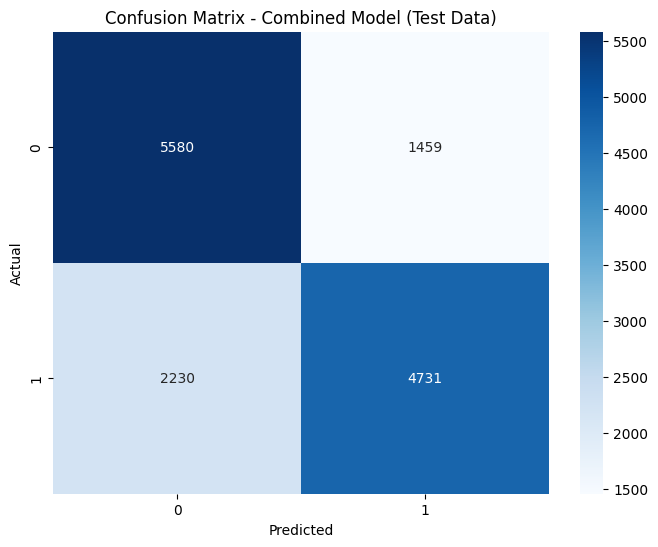

False Negative Percentage for Combined Model (Test Data): 32.04%
Accuracy for Combined Model (Test Data):  0.7365
Precision for Combined Model (Test Data):  0.7392441334894372
Recall for Combined Model (Test Data):  0.7365
F1 Score for Combined Model (Test Data):  0.7356167437833457


In [58]:
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Define the function to calculate false negative percentage
def calculate_false_negative(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    return fn / (fn + tp) * 100

# Combine predictions using majority voting
combined_test_predictions = []
for p1, p2, p3, p4 in zip(test_predictions1, test_predictions2, test_predictions3, test_predictions4):
    votes = Counter([p1, p2, p3, p4])
    combined_test_predictions.append(votes.most_common(1)[0][0])

# Plot confusion matrix for the combined model
cm_combined = confusion_matrix(y_test, combined_test_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_combined, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix - Combined Model (Test Data)")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Calculate and print the false negative percentage for the combined model
false_negative_percentage_combined = calculate_false_negative(y_test, combined_test_predictions)
print(f"False Negative Percentage for Combined Model (Test Data): {false_negative_percentage_combined:.2f}%")

# Calculate metrics for the combined model
accuracy_combined = accuracy_score(y_test, combined_test_predictions)
precision_combined = precision_score(y_test, combined_test_predictions, average='weighted')
recall_combined = recall_score(y_test, combined_test_predictions, average='weighted')
f1_combined = f1_score(y_test, combined_test_predictions, average='weighted')

# Print metrics for the combined model
print("Accuracy for Combined Model (Test Data): ", accuracy_combined)
print("Precision for Combined Model (Test Data): ", precision_combined)
print("Recall for Combined Model (Test Data): ", recall_combined)
print("F1 Score for Combined Model (Test Data): ", f1_combined)
